# 4 - Introducción a Redes Neuronales: Entrenando XOR

# Teoría

![sequential](https://miro.medium.com/max/874/1*eJ36Jpf-DE9q5nKk67xT0Q.jpeg)

![1](https://user-images.githubusercontent.com/44867923/142437272-a3fa3b24-3971-465e-a345-310226cdf0a8.jpg)

![2](https://user-images.githubusercontent.com/44867923/142437281-ad63558c-2e6b-49ca-9ed2-43c1b90f1b1c.jpg)

![3](https://user-images.githubusercontent.com/44867923/142437293-cd97dbb9-9760-4ee3-bb0e-525a50611df6.jpg)

![4](https://user-images.githubusercontent.com/44867923/142437309-075a6909-711b-46a6-9e10-82ec3c018a0a.jpg)

## Programando nuestra primera red neuronal

![xor](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJzCK1SGgUZMI5UOPqzXlhKtHoVMz-Uw0WMUMbI0D87gqycOsMph0pWASWLZ6OMVQJvVs&usqp=CAU)

#### Import Libraries

In [1]:
import os
import datetime
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Avoid TF Debug Warnings

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import callbacks

## Get the data

In [3]:
# Datos de entrada
X = np.array([
    [0,0], # Ambos false
    [0,1], # Uno true y uno false
    [1,0], # Uno true y uno false
    [1,1]] # Ambos true
)

# Clases o etiquetas
Y = np.array([
    [0], # Ambos false: false
    [1], # Uno true y uno false: true
    [1], # Uno true y uno false: true
    [0]]  # Ambos true: false
)

## Create the model

In [4]:
model = Sequential()
model.add(Input(shape=2, name="input"))
model.add(Dense(8, activation='relu',name="hidden"))
model.add(Dense(1, activation="sigmoid", name="output"))

In [5]:
sgd = SGD(lr=0.1)

In [6]:
model.compile(loss='binary_crossentropy', optimizer=sgd)

#### Visualize the model

In [7]:
from tensorflow.keras.utils import plot_model

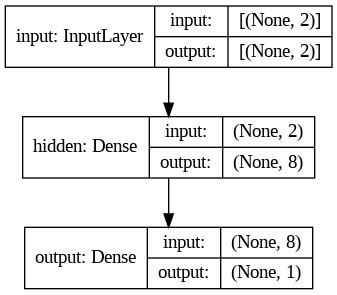

In [8]:
plot_model(model, show_shapes=True)

## Train

#### Save the error of the model on every epoch so we can plot it

In [9]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)

#### Train the model

In [10]:
model.fit(X, Y, batch_size=1, epochs=1000, verbose=0, callbacks=[tensorboard_callback])

#### Visualize the training

In [11]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [21]:
import tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 8690), started 0:00:33 ago. (Use '!kill 8690' to kill it.)

### Use the model: Inference

In [13]:
x_data = y_data = np.linspace(0,1,20)

In [14]:
xx_data, yy_data = np.meshgrid(x_data, y_data)

In [15]:
xx = xx_data.flatten()
yy = yy_data.flatten()

In [16]:
data = np.column_stack((xx, yy))

In [17]:
res = model.predict(data)

#### Visualize Inference

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

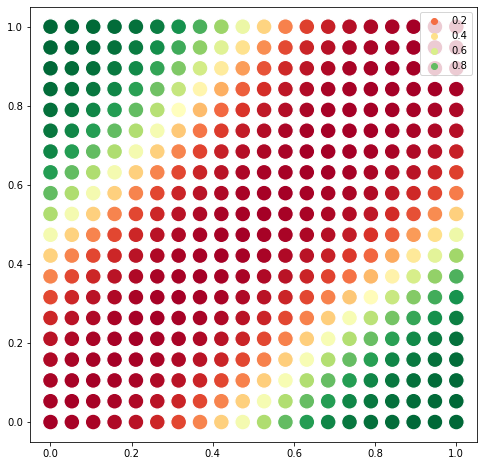

In [19]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=xx, y=yy, hue=res.flatten(), palette="RdYlGn", s=250)